In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date','imdb_url']
g_cols = ['movie_id', 'title', 'release_date', 'video_release_date',
          'imdb_url', 'Unknown','Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror ', 'Musical', 'Mystery',
         'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [3]:
users=pd.read_csv("ml-100k/u.user",sep='|',names=u_cols,encoding='latin-1')
ratings = pd.read_csv('ml-100k/u.data',sep='\t', names=r_cols,encoding='latin-1')
movies = pd.read_csv('ml-100k/u.item', sep='|', names=m_cols, usecols=range(5),encoding='latin-1')
movielens=pd.merge(users,ratings)
movielens=pd.merge(movielens,movies)
movielens.head(1)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


In [4]:
genre = pd.read_csv('ml-100k/u.item', sep='|', names=g_cols, encoding='latin-1')
genre.head(1)

,movie_id,title,release_date,video_release_date,imdb_url,Unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
movielens=pd.merge(movielens,genre)
movielens.head(1)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dfnew = movielens[['movie_id','title','release_date','rating']]
dfnew.head(1)
dff = movielens[['Unknown','Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror ', 'Musical', 'Mystery',
         'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]

In [7]:
dfnew.describe()

,movie_id,rating
count,100000.000000,100000.000000
mean,425.530130,3.529860
std,330.798356,1.125674
min,1.000000,1.000000
25%,175.000000,3.000000
50%,322.000000,4.000000
75%,631.000000,4.000000
max,1682.000000,5.000000


In [8]:
dff.head()

,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [9]:
movielens.describe()

,user_id,age,movie_id,rating,timestamp,video_release_date,Unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,100000.000000,1.000000e+05,0.0,100000.0000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,100000.000000
mean,462.48475,32.969850,425.530130,3.529860,8.835289e+08,NaN,0.0001,0.255890,0.137530,0.036050,...,0.013520,0.017330,0.053170,0.049540,0.052450,0.194610,0.12730,0.21872,0.093980,0.018540
std,266.61442,11.562623,330.798356,1.125674,5.343856e+06,NaN,0.0100,0.436362,0.344408,0.186416,...,0.115487,0.130498,0.224373,0.216994,0.222934,0.395902,0.33331,0.41338,0.291802,0.134894
min,1.00000,7.000000,1.000000,1.000000,8.747247e+08,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,254.00000,24.000000,175.000000,3.000000,8.794487e+08,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
50%,447.00000,30.000000,322.000000,4.000000,8.828269e+08,NaN,0.0000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
75%,682.00000,40.000000,631.000000,4.000000,8.882600e+08,NaN,0.0000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000
max,943.00000,73.000000,1682.000000,5.000000,8.932866e+08,NaN,1.0000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000


In [10]:
movielens.shape

(100000, 31)

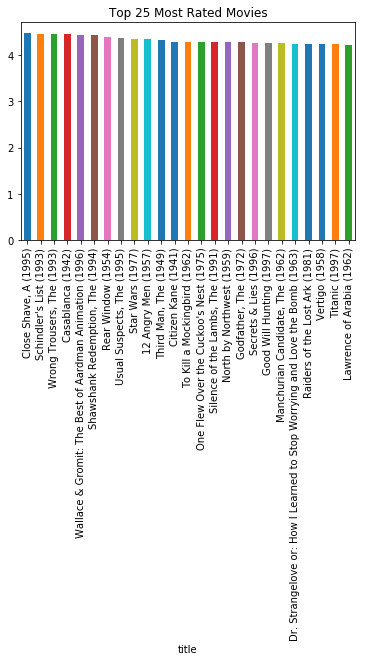

In [11]:
temp_stat = movielens.groupby('title').agg({'rating':[np.size,np.mean]})
temp_stat = temp_stat[temp_stat['rating']['size'] > 50]
temp_stat = temp_stat.sort_values(by=('rating', 'mean'), ascending=False)
top25 = temp_stat['rating']['mean'][:25]
top25_id = top25.index

top25.plot(kind="bar",title="Top 25 Most Rated Movies")

In [12]:
mlmovie=movielens.drop(['user_id','zip_code'],axis=1)
mlmovie=mlmovie.drop(['sex','title', 'age','timestamp','release_date','video_release_date','imdb_url','Unknown',
                      'Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror ', 'Musical', 'Mystery',
         'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],axis=1)
mlmovie

,occupation,movie_id,rating
0,technician,61,4
1,educator,61,4
2,other,61,4
3,programmer,61,5
4,educator,61,4
5,healthcare,61,4
6,student,61,4
7,student,61,5
8,programmer,61,3
9,student,61,4


In [13]:
movie_stat = movielens.groupby('movie_id').agg({'rating':[np.size,np.mean]})
movie_stat = movie_stat[movie_stat['rating']['size'] > 50]
movie_stat = movie_stat.sort_values(by=('rating', 'mean'), ascending=False)
top25 = movie_stat[:25]
top25_id = top25.index
print(type(top25_id[0]))
print(top25)

<class 'numpy.int64'>
         rating          
           size      mean
movie_id                 
408         112  4.491071
318         298  4.466443
169         118  4.466102
483         243  4.456790
114          67  4.447761
64          283  4.445230
603         209  4.387560
12          267  4.385768
50          583  4.358491
178         125  4.344000
513          72  4.333333
134         198  4.292929
427         219  4.292237
357         264  4.291667
98          390  4.289744
480         179  4.284916
127         413  4.283293
285         162  4.265432
272         198  4.262626
657         131  4.259542
474         194  4.252577
174         420  4.252381
479         179  4.251397
313         350  4.245714
511         173  4.231214


In [14]:
distoccup=mlmovie.groupby('occupation').agg({'rating':[np.size,np.mean]})
print(distoccup['rating']['size'])

occupation
administrator     7479
artist            2308
doctor             540
educator          9442
engineer          8175
entertainment     2095
executive         3403
healthcare        2804
homemaker          299
lawyer            1345
librarian         5273
marketing         1950
none               901
other            10663
programmer        7801
retired           1609
salesman           856
scientist         2058
student          21957
technician        3506
writer            5536
Name: size, dtype: int64


In [15]:
temp_list = []
occu_list = []
for i in mlmovie['occupation']:
    temp_list.append(i)
temp_list = set(temp_list)
for i in temp_list:
    occu_list.append(i)

allmovie = []
for i in occu_list:
    allmovie.append(mlmovie[mlmovie['occupation'] == i])
print(type(allmovie[0]))
for i in range(len(occu_list)):  
    allmovie[i] = allmovie[i].groupby('movie_id').agg({'rating':[np.size,np.mean]})
    allmovie[i] = allmovie[i][allmovie[i]['rating']['size'] > 1]
    allmovie[i] = allmovie[i].sort_values(by=('rating', 'mean'), ascending=False)

rank_list = []
for k in range(len(allmovie)):
    temp = []
    for i in range(25):
        for j in range(len(allmovie[k].index)):
            if(allmovie[k].index[j] == top25_id[i]):
                temp.append(j+1)
    rank_list.append(temp)

rank_select = []
occu_select = []
for i in range(len(rank_list)):
    if(len(rank_list[i]) == 25):
        rank_select.append(rank_list[i])
        occu_select.append(occu_list[i])
print(occu_select)
print(rank_select)   

<class 'pandas.core.frame.DataFrame'>
['technician', 'student', 'writer', 'artist', 'other', 'administrator', 'educator', 'librarian', 'programmer', 'engineer']
[[35, 15, 1, 69, 9, 5, 30, 49, 39, 23, 136, 92, 197, 154, 264, 46, 44, 28, 288, 27, 170, 76, 6, 42, 175], [20, 65, 82, 14, 11, 18, 51, 41, 45, 97, 44, 50, 90, 49, 75, 56, 42, 107, 22, 16, 88, 78, 53, 21, 234], [32, 50, 44, 240, 157, 185, 68, 84, 177, 61, 36, 42, 94, 116, 86, 93, 30, 99, 241, 70, 64, 193, 192, 179, 74], [8, 95, 12, 59, 302, 229, 43, 76, 45, 80, 42, 149, 109, 98, 58, 51, 63, 125, 146, 54, 127, 92, 94, 135, 126], [28, 14, 79, 103, 65, 49, 70, 84, 101, 105, 44, 87, 52, 72, 75, 126, 144, 108, 51, 33, 153, 110, 92, 89, 30], [3, 20, 21, 24, 233, 23, 89, 81, 72, 26, 48, 112, 65, 115, 53, 60, 73, 68, 135, 98, 95, 67, 110, 87, 62], [160, 17, 37, 22, 8, 71, 21, 46, 25, 34, 52, 117, 19, 99, 138, 72, 91, 65, 24, 89, 20, 109, 67, 48, 53], [32, 12, 62, 35, 67, 33, 64, 51, 71, 8, 6, 14, 80, 97, 86, 75, 42, 4, 63, 244, 261, 249

In [16]:
import numpy as np
def error_function(datay, dataX, W):
    E = 0
    for i in range(0, len(dataX)):
        E += (pow((datay[i] - np.dot(W.T, dataX[i])), 2))/2
    return E
def W_calculate(datay,dataX):
    a = np.dot(dataX.T,dataX)
    b = np.linalg.inv(a)
    c = np.dot(b, dataX.T)
    W = np.dot(c, datay)
    return W

y = []
for i in range(1,26):
    y.append(i)
ones = []
for i in range(1,26):
    ones.append(1)
datay = np.array(y)
result = []
for i in range(len(rank_select)):
    temp = ones
    dataX = np.row_stack([temp, rank_select[i]]).T
    W = W_calculate(datay,dataX)
    E = error_function(datay, dataX, W)
    result.append(E)
print(result)

[561.2802798265174, 558.3305813585948, 626.7050249804805, 643.1629909237928, 590.6556835590101, 594.0750484655622, 637.4416075352658, 399.7984497420633, 561.9719310798046, 565.1251541061841]


[561.2802798265174, 558.3305813585948, 626.7050249804805, 643.1629909237928, 590.6556835590101, 594.0750484655622, 637.4416075352658, 399.7984497420633, 561.9719310798046, 565.1251541061841]


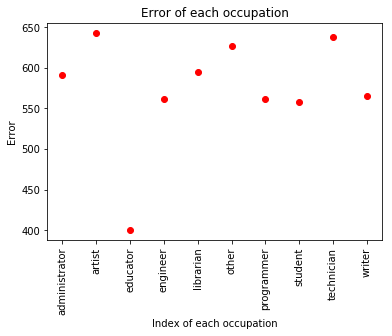

In [17]:
import matplotlib.pyplot as plt
x = ['programmer', 'student', 'other', 'artist', 'administrator', 'librarian', 'technician', 'educator', 'engineer', 'writer']
y = result
print(y)

plt.plot(x, y,'ro')
# plt.setp(line, linestyle = '-')
plt.xticks(x, ('programmer', 'student', 'other', 'artist', 'administrator', 'librarian', 'technician', 'educator', 
               'engineer', 'writer'), rotation=90)
# plt.setp(line, color="blue", linewidth=2)
plt.xlabel("Index of each occupation")  
plt.ylabel("Error")  
plt.title("Error of each occupation") 
plt.show()

In [18]:
LIC = np.row_stack([ones, rank_select[5]]).T
W = W_calculate(datay,LIC)
predict = []
for i in range(len(LIC)):
    temp = 0
    for j in range(len(W)):
        temp += LIC[i][j] * W[j]
    predict.append(temp)
print(predict)

[9.806872965360844, 10.575756245656391, 10.62098467390907, 10.756669958667109, 20.20941146347709, 10.71144153041443, 13.696517795091264, 13.33469036906983, 12.927634514795717, 10.847126815172468, 11.842152236731414, 14.73677164490289, 12.611035517026961, 14.872456929660927, 12.06829437799481, 12.384893375763564, 12.972862943048396, 12.746720801784999, 15.777025494714515, 14.10357364936538, 13.96788836460734, 12.70149237353232, 14.64631478839753, 13.606060938585905, 12.475350232268923]


In [19]:
top25.index

Int64Index([408, 318, 169, 483, 114,  64, 603,  12,  50, 178, 513, 134, 427,
            357,  98, 480, 127, 285, 272, 657, 474, 174, 479, 313, 511],
           dtype='int64', name='movie_id')

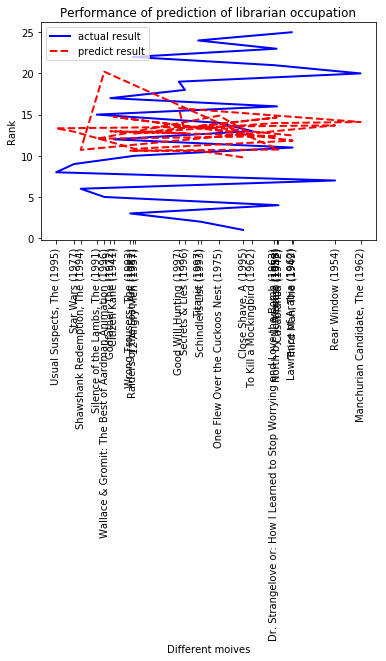

In [20]:
import matplotlib.pyplot as plt
x = []
for i in range(1,26):
    x.append(i)
y1 = datay
y2 = predict

lines = plt.plot(top25.index, y1, top25.index, y2)
plt.xticks(top25.index, ('Close Shave, A (1995)', 'Schindlers List (1993)',
       'Wrong Trousers, The (1993)', 'Casablanca (1942)',
       'Wallace & Gromit: The Best of Aardman Animation (1996)',
       'Shawshank Redemption, The (1994)', 'Rear Window (1954)',
       'Usual Suspects, The (1995)', 'Star Wars (1977)', '12 Angry Men (1957)',
       'Third Man, The (1949)', 'Citizen Kane (1941)',
       'To Kill a Mockingbird (1962)',
       'One Flew Over the Cuckoos Nest (1975)',
       'Silence of the Lambs, The (1991)', 'North by Northwest (1959)',
       'Godfather, The (1972)', 'Secrets & Lies (1996)',
       'Good Will Hunting (1997)', 'Manchurian Candidate, The (1962)',
       'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)',
       'Raiders of the Lost Ark (1981)', 'Vertigo (1958)', 'Titanic (1997)',
       'Lawrence of Arabia (1962)'), rotation=90)
line1, line2 = lines
plt.setp(line1, linestyle = '-')
plt.setp(line2, linestyle = '--')
plt.setp(line1, color="blue", linewidth=2)
plt.setp(line2, color="red", linewidth=2)
plt.xlabel("Different moives")  
plt.ylabel("Rank")  
plt.title("Performance of prediction of librarian occupation") 
plt.legend(('actual result', 'predict result'), loc = 2)
plt.show()

### Ratings VS Title_Year Analysis

In [21]:
dfnew.head()

,movie_id,title,release_date,rating
0,61,Three Colors: White (1994),01-Jan-1994,4
1,61,Three Colors: White (1994),01-Jan-1994,4
2,61,Three Colors: White (1994),01-Jan-1994,4
3,61,Three Colors: White (1994),01-Jan-1994,5
4,61,Three Colors: White (1994),01-Jan-1994,4


In [22]:
dfnew['date'], dfnew['rest'] = dfnew['release_date'].str.split('-', 1).str
dfnew['month'], dfnew['year'] = dfnew['rest'].str.split('-', 1).str
dfnew.head()

,movie_id,title,release_date,rating,date,rest,month,year
0,61,Three Colors: White (1994),01-Jan-1994,4,01,Jan-1994,Jan,1994
1,61,Three Colors: White (1994),01-Jan-1994,4,01,Jan-1994,Jan,1994
2,61,Three Colors: White (1994),01-Jan-1994,4,01,Jan-1994,Jan,1994
3,61,Three Colors: White (1994),01-Jan-1994,5,01,Jan-1994,Jan,1994
4,61,Three Colors: White (1994),01-Jan-1994,4,01,Jan-1994,Jan,1994


In [23]:
dfnew.year.values

array(['1994', '1994', '1994', ..., '1998', '1994', '1996'], dtype=object)

[Text(0,0,'1920'),
 Text(0,0,'1940'),
 Text(0,0,'1960'),
 Text(0,0,'1980'),
 Text(0,0,'2000')]

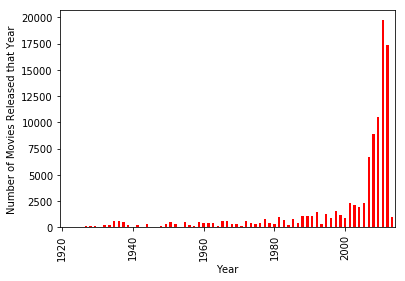

In [24]:
ax = dfnew.year.value_counts().sort_index().plot(kind='bar', color = 'r',stacked=False)
plt.locator_params(axis = 'x', nbins=5)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released that Year')
ax.set_xticklabels(['1920','1940','1960','1980','2000'])

Text(0,0.5,'Number of Movies Received that Score')

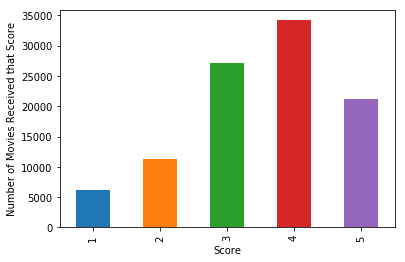

In [25]:
tmp2 = dfnew.rating.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Number of Movies Received that Score')

In [26]:
n = dfnew.groupby(['year'], as_index=False)['rating'].mean()
n.head()
n['year'] = n.year.astype(float)

Text(0.5,0,'Year')

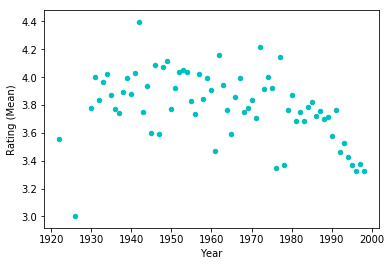

In [27]:
n.plot(kind='scatter', x='year', y='rating', color='c')
plt.ylabel('Rating (Mean)')
plt.xlabel('Year')

Text(0.5,0,'Year')

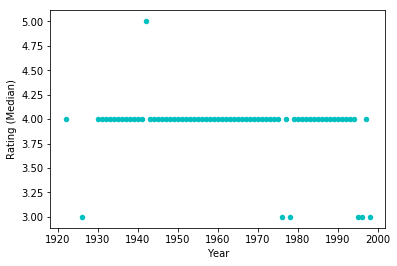

In [28]:
n2 = dfnew.groupby(['year'], as_index=False)['rating'].median()
n2['year'] = n2.year.astype(float)
n2.plot(kind='scatter', x='year', y='rating', color='c')
plt.ylabel('Rating (Median)')
plt.xlabel('Year')

## Correlation Matrix for Genres

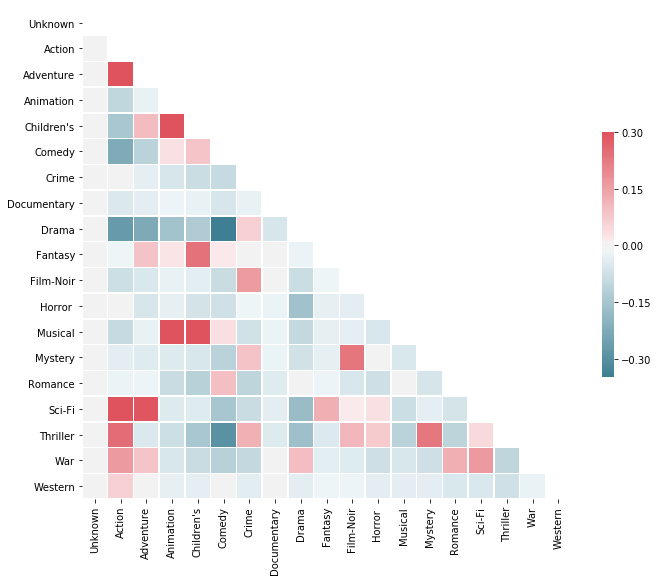

In [29]:
import seaborn as sns

corr = dff.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Prediction with Random Forest

In [32]:
import json
import urllib
import pandas as pd
import imp
import numpy as np
import seaborn as sns
from tqdm import tqdm
import math

from sklearn.preprocessing import Imputer
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score

from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [122]:
movielens.head(1)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0


In [123]:
dfp = movielens[['rating','age','Unknown','Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror ', 'Musical', 'Mystery',
         'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']]
dfp.head()

,rating,age,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,4,24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,47,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,35,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,49,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
headers = ['rating','age','Unknown','Action', 'Adventure', 'Animation', 'Children\'s', 'Comedy', 
          'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror ', 'Musical', 'Mystery',
         'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
print(headers)

['rating', 'age', 'Unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror ', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [125]:
for col in headers:
    column = np.array(dfp[col]).reshape(1, -1)
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    dfp[col] = imp.fit_transform(column)[0]
dfp2 = dfp.head(10000)

In [126]:
dfp2.describe()

,rating,age,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,...,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,3.698200,32.313900,0.0,0.433200,0.242500,0.018300,0.044900,0.202600,0.084000,0.0,...,0.012900,0.0,0.034900,0.069800,0.022800,0.183100,0.29770,0.231000,0.086800,0.013700
std,1.088134,10.974234,0.0,0.495542,0.428617,0.134041,0.207095,0.401957,0.277402,0.0,...,0.112849,0.0,0.183536,0.254822,0.149273,0.386768,0.45727,0.421493,0.281556,0.116248
min,1.000000,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,3.000000,24.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.000000,30.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,5.000000,39.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000
max,5.000000,73.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [127]:
numerical_cols = list(dfp2.dtypes[dfp.dtypes != 'object'].index)

In [128]:
print('Columns dtypes :', Counter(dfp2.dtypes))

Columns dtypes : Counter({dtype('float64'): 21})


In [129]:
y = list(dfp2.rating)
X = dfp2.drop('rating', axis=1)
X.head()

,age,Unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print('Train', X_train.shape, 'Test', X_test.shape)

Train (8000, 20) Test (2000, 20)


### RF Algorithm

In [143]:
gbr = ensemble.GradientBoostingRegressor(n_estimators=200)
gbr.fit(X_train,Y_train)
print ("Training Score RandomForest: ", str(gbr.score(X_train,Y_train)))
print ("Cross Validation (10 fold) Score: " , str(gbr.score(X_test,Y_test)))

Training Score RandomForest:  0.14514162514764084
Cross Validation (10 fold) Score:  0.109174317797461


In [132]:
abr = ensemble.AdaBoostRegressor(n_estimators=10, learning_rate=0.4, loss='linear')
abr.fit(X_train,Y_train)
print ("Training Score AdaBoostRegressor: ", str(abr.score(X_train,Y_train)))
print ("Test Score AdaBoostRegressor: " , str(abr.score(X_test,Y_test)))

Training Score AdaBoostRegressor:  0.05979589345580872
Test Score AdaBoostRegressor:  0.056900812595177985


In [142]:
# rf=ensemble.RandomForestRegressor(n_estimators=50,oob_score=True) 
# rf.fit(X,y)
# print ("Training Score RandomForest: ", str(rf.score(X,y)))
# print ("Cross Validation (10 fold) Score: " , np.mean(cross_val_score(rf, X_train, Y_train, cv=10)))
# gbr = ensemble.GradientBoostingRegressor(n_estimators=200)
# gbr.fit(X_train,Y_train)
# print ("Training Score GradientBoosting: ", str(gbr.score(X_train,Y_train)))
# print ("Test Score GradientBoosting: " , str(gbr.score(X_test,Y_test)))

## Cross Validation to choose n_estimators

Text(0,0.5,'Cross Validation score')

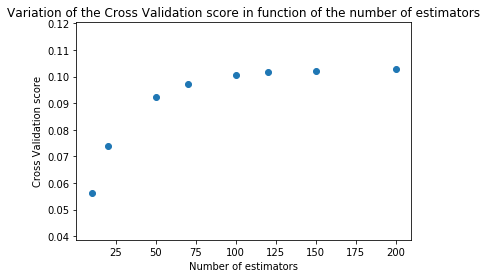

In [144]:
rfs = {}
for k in [10, 20, 50, 70, 100, 120, 150, 200]:
    rf=ensemble.GradientBoostingRegressor(n_estimators=k) 
    rf.fit(X,y)
    rfs[k] = np.mean(cross_val_score(rf, X_train, Y_train, cv=5))

x_plot = list(rfs.keys())
y_plot = list(rfs.values())

f, ax = plt.subplots()
ax.scatter(x_plot, y_plot)
ax.set_title('Variation of the Cross Validation score in function of the number of estimators')
ax.set_xlabel('Number of estimators')
ax.set_ylabel('Cross Validation score')